### <b>Peer-graded Assignment</b>
#### [IBM Machine Learning Professional Certificate](https://www.coursera.org/professional-certificates/ibm-machine-learning) <br> Module 2: Supervised Learning (Regression)

## <center> Predicting Insurance Charges
#### <center>By [Marcio Silveira](https://github.com/marciohssilveira?tab=repositories)<br>

**Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.**
* The model will focus on interpretabilty, thus, I will be predicting the charges as well as addressing the magnitude of the features.

**Brief description of the data set you chose and a summary of its attributes.**
* The data was provided by [Kaggle](https://www.kaggle.com/mirichoi0218/insurance), and it has already been cleaned. 
* It describes some factors that affect how much you pay for health insurance. Of course there are other important variables that are not in the data set but, for learning purposes, it's a good starting point to have an understanding of factors that affect how much health insurance premiums cost.
* Here is a brief description of the data columns:
    * **age:** _Age_ of primary beneficiary.
    * **sex:** Insurance contractor _gender: Female or Male_.
    * **bmi:** BMI stands for _Body Mass Index_, which is a ratio of height to weight, ideally between 18.5 and 24.9.
    * **children:** Number of children covered by health insurance / _Number of dependents_.
    * **smoker:**  Whether the insurance contractor is a smoker or not (_Yes_ or _No_).
    * **region:** The beneficiary's residential area in the US: _Northeast, Southeast, Southwest, or Northwest).

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Import data and show 5 first rows
insurance = pd.read_csv("insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
# Shape of the data
print(f'Data has {insurance.shape[0]} rows and {insurance.shape[1]} columns.')

Data has 1338 rows and 7 columns.


In [13]:
# Columns information
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
# Descriptive statistics summary
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
# Check for missing values
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Brief summary of data exploration and actions taken for data cleaning and feature engineering.**
   * As mentioned before, the data did not need any cleaning. However, the following was done in terms of feature engineering: 
       * Applied the natural log to the right skewed distribution of charges graph.
       * Looked at the charges by region.
       * Looked at sex, smoking, and having children by region.
       * Analyzed medical charges by age, bmi, and children according to the smoking factor. 
       * Converted objects labels (Sex, Smoker, and Region) into categorical.
       * Converted category labels (Sex, Smoker, and Region) into numerical using LabelEncoder.


Text(0.5, 1.0, 'Distribution of Charges AFTER log')

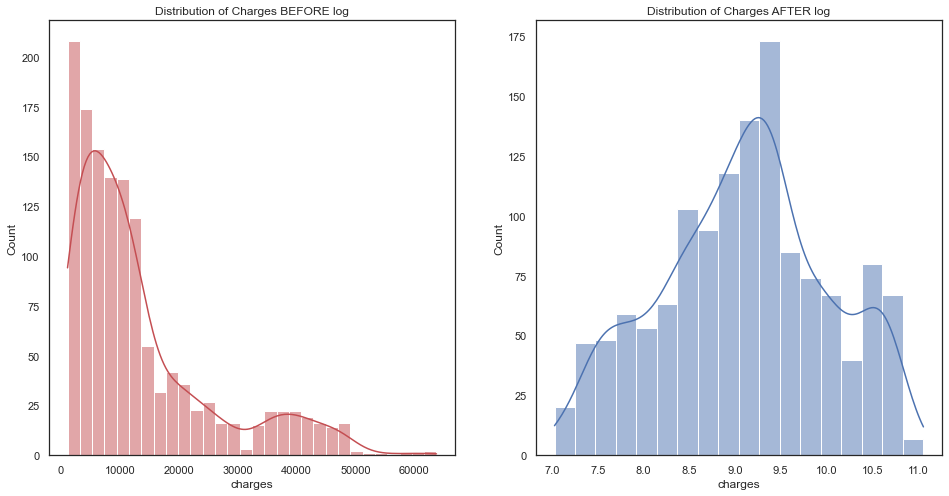

In [123]:
# Check 'charges' column for skewness visually and apply log transformation
sns.set(style='white')
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.histplot(insurance['charges'], kde = True, color = 'r', ax=ax[0]).set_title('Distribution of Charges BEFORE log')
sns.histplot(np.log1p(insurance['charges']), kde = True, color = 'b', ax=ax[1]).set_title('Distribution of Charges AFTER log')

Text(0.5, 1.0, 'Average insurance charges per REGION of the USA')

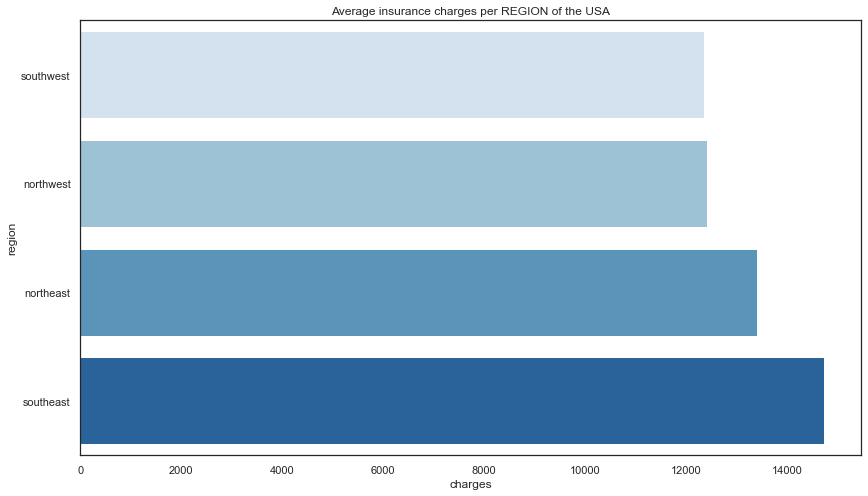

In [129]:
# Check the mean charges per region
regions = insurance.groupby(by='region', as_index=False)['charges'].mean().sort_values(by='charges', ascending = True)
sns.barplot(x='charges', y='region', data=regions, palette='Blues')
plt.title('Average insurance charges per REGION of the USA')

The highest medical charges are in the Southeast and the lowest are in the Southwest. 
Taking into account certain factors (sex, smoking, having children) let's see how it changes by region.

Text(0.5, 1.0, 'Mean price per region per GENDER')

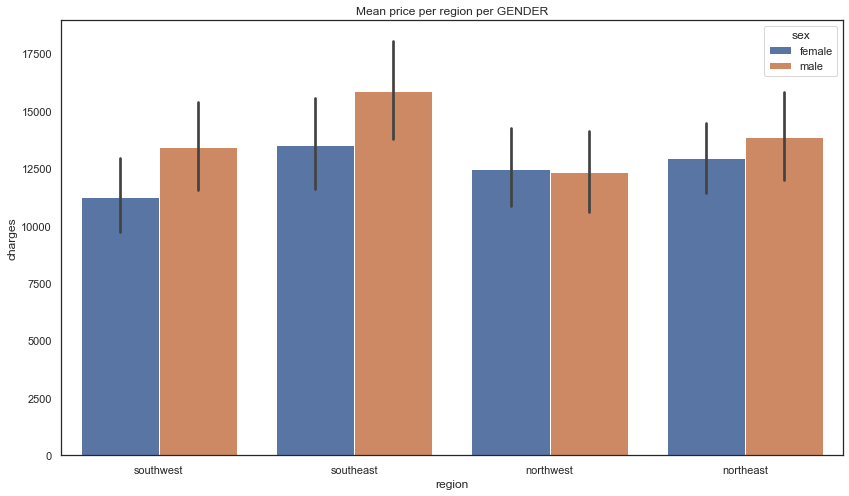

In [130]:
# Check for differences in average charges between gender and within regions
sns.set(rc={'figure.figsize':(14, 8)})
sns.set(style='white')
sns.barplot(x='region', y='charges', hue='sex', data=insurance).set_title('Mean charges per region per GENDER')

Text(0.5, 1.0, 'Mean price per region per SMOKING FACTOR')

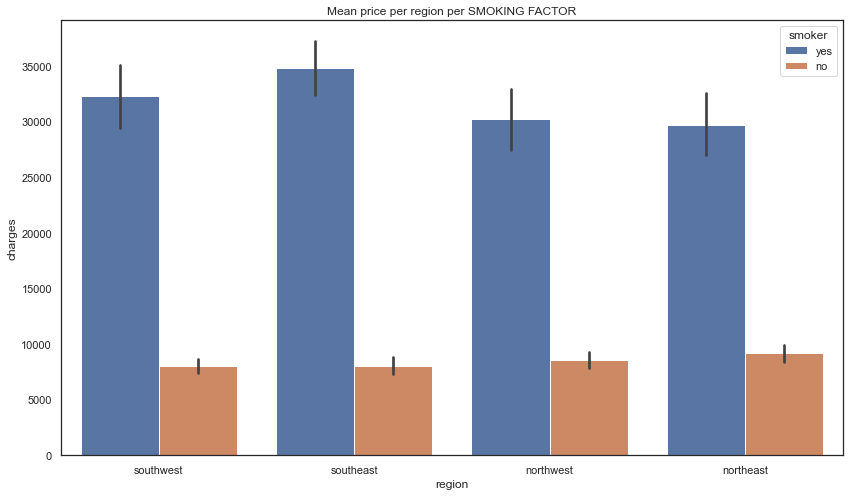

In [131]:
# Check for differences in average charges between smoker factor and within regions
sns.set(rc={'figure.figsize':(14, 8)})
sns.set(style='white')
sns.barplot(x='region', y='charges', hue='smoker', data=insurance).set_title('Mean charges per region per SMOKING FACTOR')

Text(0.5, 1.0, 'Mean charges per region per CHILDREN')

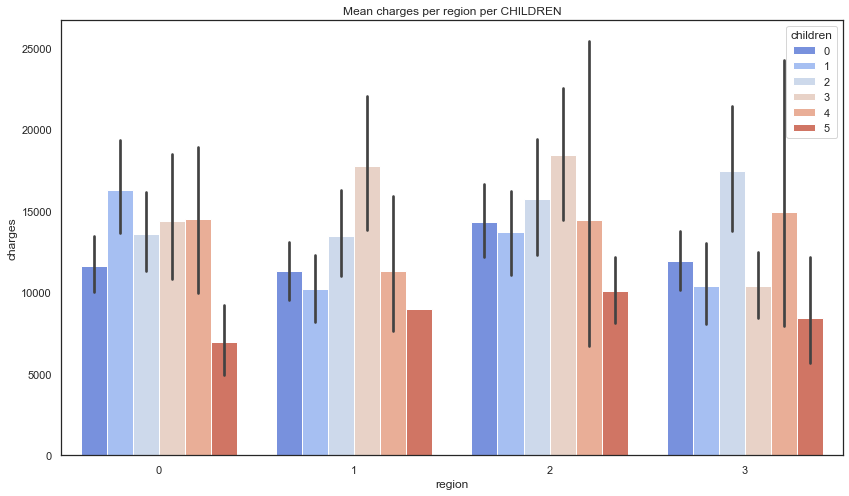

In [187]:
# Check for differences in average charges between the number of dependents and within regions
sns.set(rc={'figure.figsize':(14, 8)})
sns.set(style='white')
sns.barplot(x='region', y='charges', hue='children', data=insurance, palette='coolwarm').set_title('Mean charges per region per CHILDREN')

* As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. 
* People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. 
* Finally, people with children tend to have higher medical costs overall as well.

Now let's analyze the medical charges by age, bmi, and children according to the smoking factor.

Text(0.5, 1.0, 'Mean price per AGE per smoking factor')

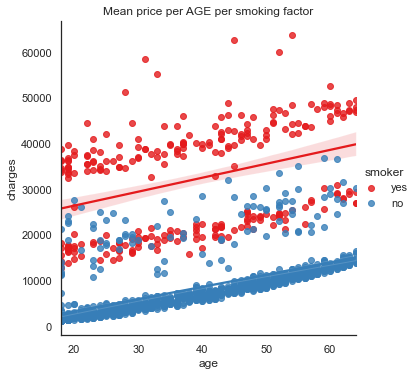

In [133]:
# Check for differences in average charges between the smoking factor and age
sns.lmplot(x = 'age', y = 'charges', data=insurance, hue='smoker', palette='Set1')
plt.title('Mean charges per AGE per smoking factor')

Text(0.5, 1.0, 'Mean price per BMI per smoking factor')

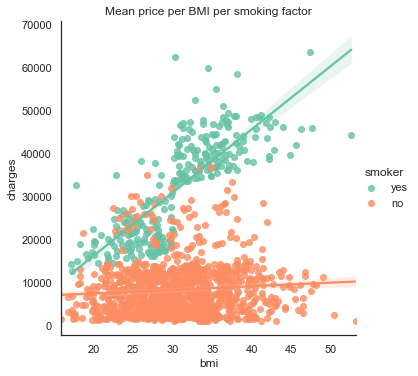

In [134]:
# Check for differences in average charges between the smoking factor and BMI
sns.lmplot(x = 'bmi', y = 'charges', data=insurance, hue='smoker', palette='Set2')
plt.title('Mean charges per BMI per smoking factor')

Text(0.5, 1.0, 'Mean price per CHILDREN per smoking factor')

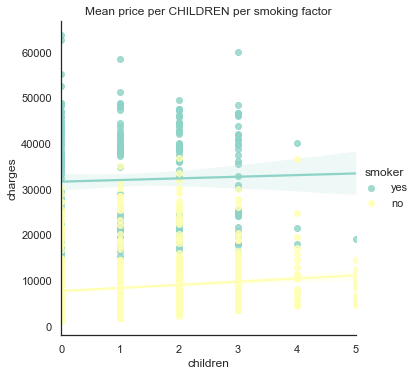

In [135]:
# Check for differences in average charges between the smoking factor and number of children
sns.lmplot(x = 'children', y = 'charges', data=insurance, hue='smoker', palette='Set3')
plt.title('Mean charges per CHILDREN per smoking factor')

Smoking has the highest impact on medical costs; even though the costs are growing with age, bmi, and children. Also people who have children generally smoke less, which the following violinplots shows as well.

Text(0.5, 1.0, 'Charges per CHILDREN per smoking factor')

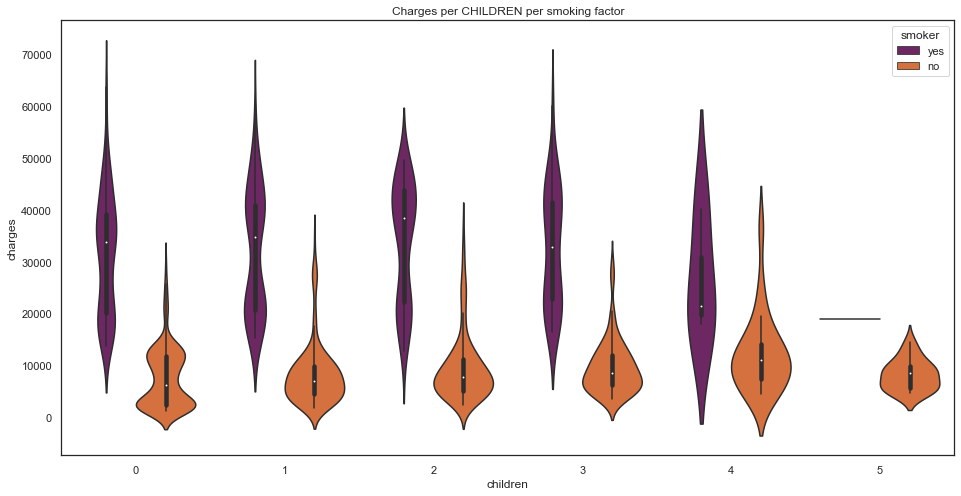

In [136]:
# Check for distribution of average charges between the smoking factor and number of children
plt.subplots(1, 1, figsize=(16, 8))
sns.violinplot(x='children', y='charges', data=insurance,
               orient='v', hue='smoker', palette='inferno')
plt.title('Charges per CHILDREN per smoking factor')

In [143]:
# Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(insurance['sex'].drop_duplicates())

insurance['sex'] = label.transform(insurance['sex'])
label.fit(insurance['smoker'].drop_duplicates())

insurance['smoker'] = label.transform(insurance['smoker'])
label.fit(insurance['region'].drop_duplicates())

insurance['region'] = label.transform(insurance['region'])
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<AxesSubplot:>

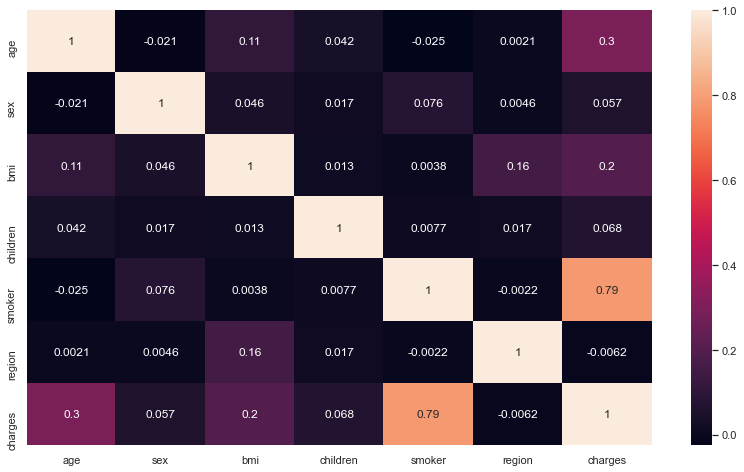

In [188]:
# Check for correlations
sns.heatmap(insurance.corr(), annot=True)

No significant correlations, except for smoker feature.

# Simple Linear Regression

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = insurance.drop(['charges'], axis = 1)
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Lin_reg = LinearRegression()
Lin_reg.fit(X_train, y_train)

print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(X_test, y_test))

-11946.606567263048
[ 2.57056264e+02 -1.87914567e+01  3.35781491e+02  4.25091456e+02
  2.36478181e+04 -2.71284266e+02]
0.7833463107364539


In [166]:
y_train_pred_lr = Lin_reg.predict(X_train)
y_pred_lr = Lin_reg.predict(X_test)

train_rmse_lr = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_lr))
test_rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))

print('Training Root Mean Squared Error:' , train_rmse_lr)
print("Testing Rooot Mean Squared Error:" , test_rmse_lr)

# print ("R^2 Score:", ridge.score(y_train, y_train_pred))
print ("R^2 Train Score:", metrics.r2_score(y_train, (y_train_pred_lr)))
print("R^2 Test Score:", metrics.r2_score(y_test, y_pred_lr))

Training Root Mean Squared Error: 6105.789320191615
Testing Rooot Mean Squared Error: 5799.587091438356
R^2 Train Score: 0.7417049283233981
R^2 Test Score: 0.7833463107364539


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

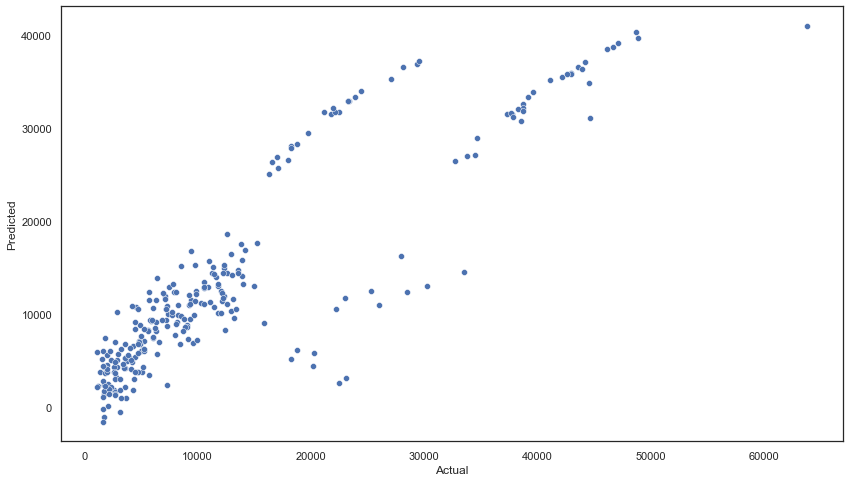

In [169]:
df_lr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
sns.scatterplot(data=df_lr, x='Actual', y='Predicted')

The baseline result was good, but improvements can be made by reducing unimportant features.

# Ordinary Least Squares (OLS)

In [172]:
import statsmodels.api as stats
model = stats.OLS(y_train, X_train)
ols = model.fit()
print(ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.871
Model:                            OLS   Adj. R-squared (uncentered):              0.871
Method:                 Least Squares   F-statistic:                              1200.
Date:                Mon, 29 Mar 2021   Prob (F-statistic):                        0.00
Time:                        09:54:05   Log-Likelihood:                         -10903.
No. Observations:                1070   AIC:                                  2.182e+04
Df Residuals:                    1064   BIC:                                  2.185e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [173]:
y_train_pred_ols = ols.predict(X_train)
y_pred_ols = ols.predict(X_test)

train_rmse_ols = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_ols))
test_rmse_ols = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ols))

print('Training Root Mean Squared Error:' , train_rmse_ols)
print("Testing Rooot Mean Squared Error:" , test_rmse_ols)

# print ("R^2 Score:", ridge.score(y_train, y_train_pred))
print ("R^2 Train Score:", metrics.r2_score(y_train, (y_train_pred_ols)))
print("R^2 Test Score:", metrics.r2_score(y_test, y_pred_ols))

Training Root Mean Squared Error: 6443.398770567203
Testing Rooot Mean Squared Error: 6142.028799493614
R^2 Train Score: 0.7123512376362529
R^2 Test Score: 0.7570059516022006


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

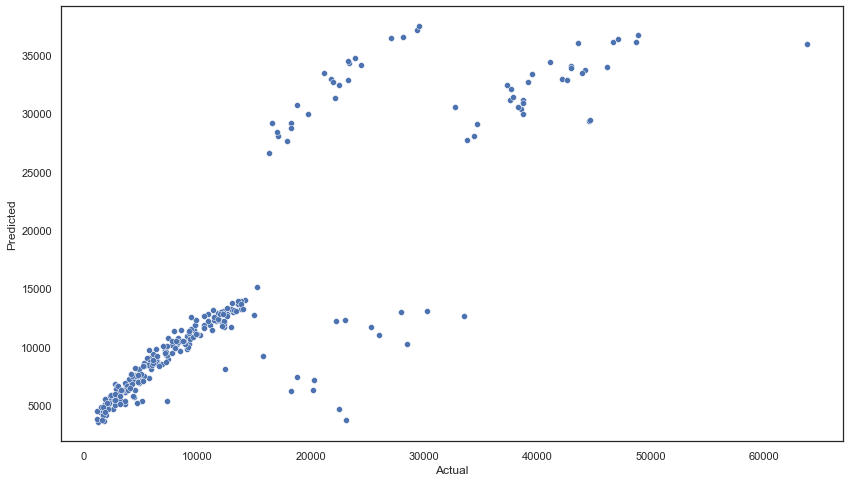

In [174]:
df_ols = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ols})
sns.scatterplot(data=df_ols, x='Actual', y='Predicted')

# Ridge Regression

In [175]:
from sklearn.linear_model import Ridge

Ridge = Ridge(alpha=0.001, fit_intercept=True, normalize=False, random_state=42)
Ridge.fit(X_train, y_train)

y_train_pred_ridge = Ridge.predict(X_train)
y_pred_ridge = Ridge.predict(X_test)

train_rmse_ridge = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_ridge))
test_rmse_ridge = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge))

print('Training Root Mean Squared Error:' , train_rmse_ridge)
print("Testing Rooot Mean Squared Error:" , test_rmse_ridge)

# print ("R^2 Score:", ridge.score(y_train, y_train_pred))
print ("R^2 Train Score:", metrics.r2_score(y_train, (y_train_pred_ridge)))
print("R^2 Test Score:", metrics.r2_score(y_test, y_pred_ridge))

Training Root Mean Squared Error: 6105.789320438453
Testing Rooot Mean Squared Error: 5799.590353421407
R^2 Train Score: 0.7417049283025139
R^2 Test Score: 0.783346067022255


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

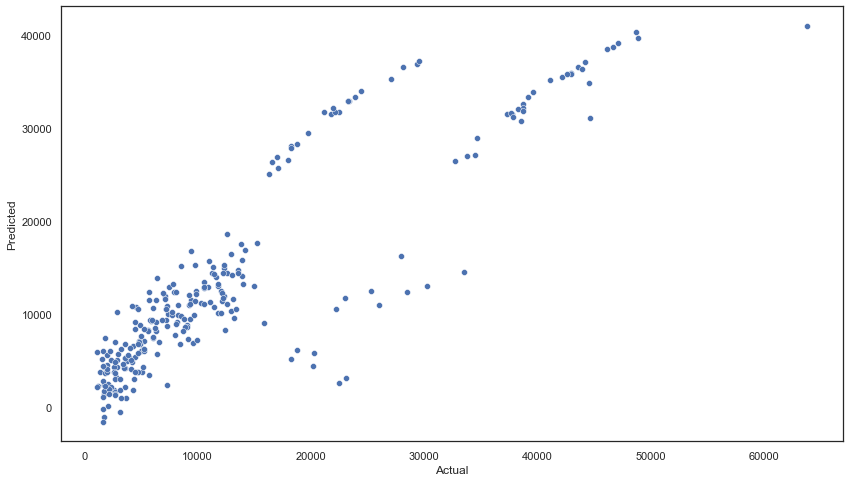

In [176]:
df_ridge = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ridge})
sns.scatterplot(data=df_ridge, x='Actual', y='Predicted')

<AxesSubplot:title={'center':'Modal Coefficients'}>

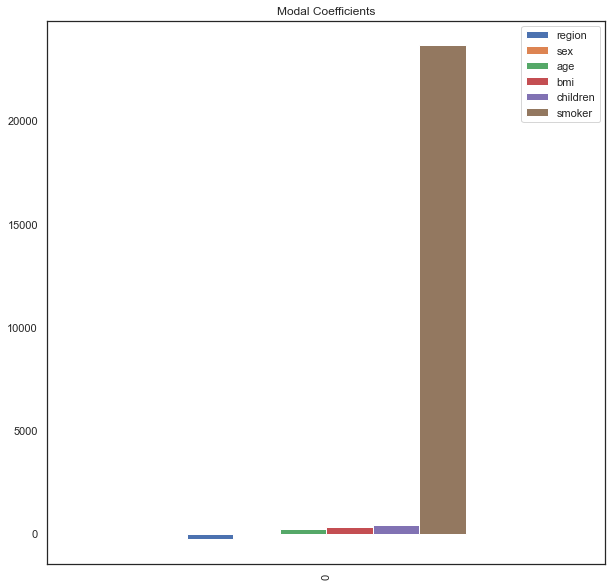

In [177]:
ridge_coef01 = pd.DataFrame(data=Ridge.coef_).T
ridge_coef01.columns = X_train.columns
ridge_coef01 = ridge_coef01.T.sort_values(by=0).T
ridge_coef01.plot(kind='bar', title='Modal Coefficients', legend=True, figsize=(10,10))

# Lasso

In [178]:
from sklearn.linear_model import Lasso

Lasso = Lasso(alpha=0.001, fit_intercept=True, normalize=False, random_state=42)

Lasso.fit(X_train, y_train)

y_train_pred_lasso = Lasso.predict(X_train)
y_pred_lasso = Lasso.predict(X_test)
train_rmse_lasso = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_lasso))
test_rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))

print('Training Root Mean Squared Error:' , train_rmse_lasso)
print("Testing Rooot Mean Squared Error:" , test_rmse_lasso)

# print ("R^2 Score:", lasso.score(y_train, y_train_pred))
print ("R^2 Train Score:", metrics.r2_score(y_train, (y_train_pred_lasso)))
print("R^2 Test Score:", metrics.r2_score(y_test, y_pred_lasso))

Training Root Mean Squared Error: 6105.78932019264
Testing Rooot Mean Squared Error: 5799.587446335919
R^2 Train Score: 0.7417049283233113
R^2 Test Score: 0.7833462842208183


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

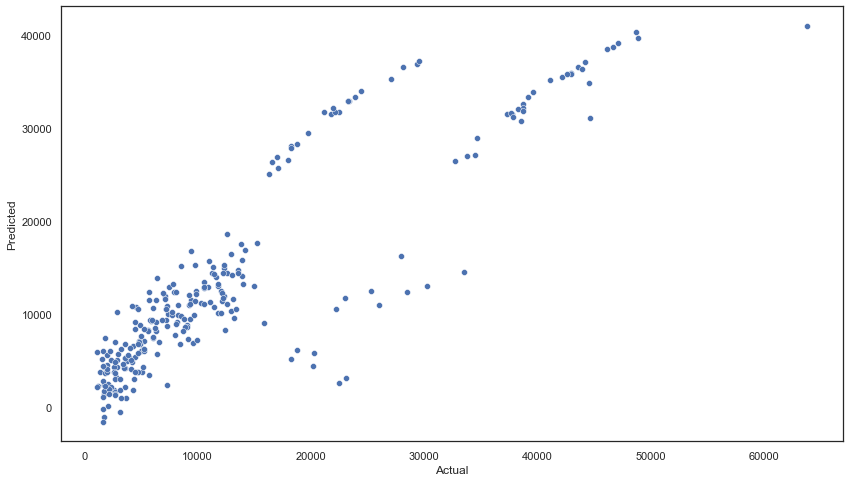

In [179]:
df_lasso = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lasso})
sns.scatterplot(data=df_lasso, x='Actual', y='Predicted')

<AxesSubplot:title={'center':'Modal Coefficients'}>

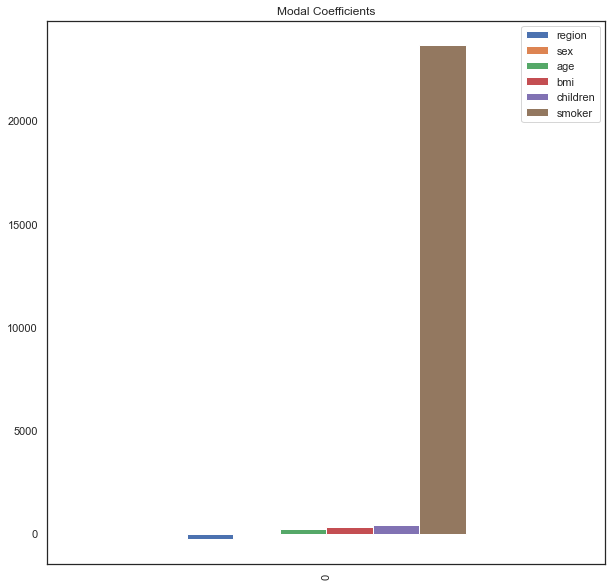

In [180]:
lasso_coef01 = pd.DataFrame(data=Lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=True, figsize=(10,10))

# Polynomial Regression

In [182]:
from sklearn.preprocessing import PolynomialFeatures

X = insurance.drop(['charges', 'sex', 'region'], axis=1)
y = insurance.charges

pol = PolynomialFeatures (degree = 3)

X_pol = pol.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pol, y, test_size=0.20, random_state=42)

Pol_reg = LinearRegression()
Pol_reg.fit(X_train, y_train)

y_train_pred_plr = Pol_reg.predict(X_train)
y_test_pred_plr = Pol_reg.predict(X_test)

print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(X_test, y_test))

34288.94982070938
[ 3.15464039e-07 -4.99528745e+01 -3.41482037e+03  5.90926806e+03
 -1.24245357e+04  5.05325736e+00  4.65623016e+00 -2.46091361e+02
  2.44947382e+01  1.10673636e+02  4.15759857e+01  1.27441657e+03
 -7.49957293e+02 -5.72818911e+02 -1.24245357e+04 -3.26821468e-02
  4.68016415e-02  2.11634627e+00 -3.45467953e+00 -1.74142394e-01
  1.41208405e+00  7.02992932e+00  8.56161155e+00  1.04997464e+01
  2.44947368e+01 -1.10286704e+00 -1.38494598e+00 -2.10765215e+01
 -3.07716685e-01 -3.23811939e+01  1.27441657e+03  5.28380416e+01
  4.05878013e+02 -5.72818911e+02 -1.24245357e+04]
0.8690550878812027


In [183]:
# Evaluating the performance of the algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred_plr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred_plr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_plr)))

Mean Absolute Error: 2745.5381461579286
Mean Squared Error: 20329031.501745053
Root Mean Squared Error: 4508.77272677888


In [184]:
train_rmse_plr = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_plr))
test_rmse_plr = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_plr))

print('Training Root Mean Squared Error:' , train_rmse_plr)
print("Testing Rooot Mean Squared Error:" , test_rmse_plr)

# print ("R^2 Score:", lasso.score(y_train, y_train_pred))
print ("R^2 Train Score:", metrics.r2_score(y_train, (y_train_pred_plr)))
print("R^2 Test Score:", metrics.r2_score(y_test, y_test_pred_plr))

Training Root Mean Squared Error: 4781.909147452257
Testing Rooot Mean Squared Error: 4508.77272677888
R^2 Train Score: 0.8415708357607841
R^2 Test Score: 0.8690550878812027


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

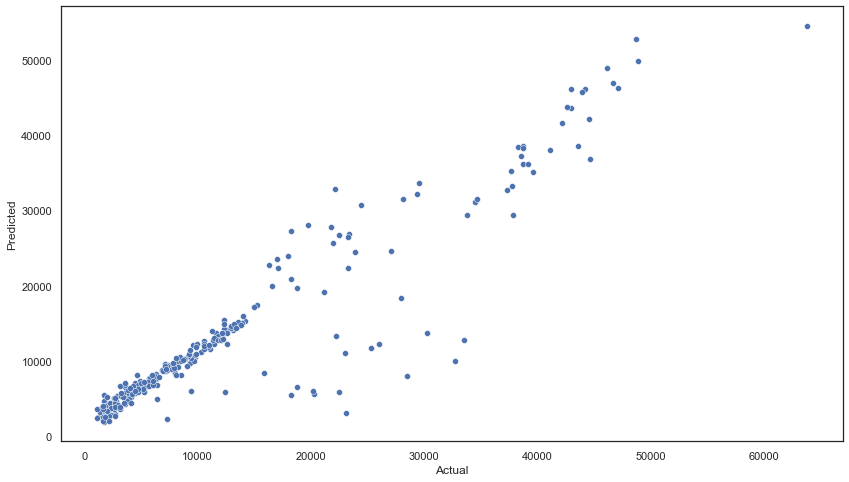

In [186]:
df_plr = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_plr})
sns.scatterplot(data=df_plr, x='Actual', y='Predicted')

**Summary of training at least three linear regression models which should be variations that cover using a simple linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.**
   * The baseline linear regression model resulted in a R^2 Train Score: 0.7417 & **R^2 Test Score: 0.7833**.
   * The OLS model resulted in a R^2 Train Score: 0.7123 & **R^2 Test Score: 0.7570**.
   * The Ridge model resulted in a R^2 Train Score: 0.7417 & **R^2 Test Score: 0.7833**. 
   * The Lasso model resulted in a R^2 Train Score: 0.7417 & **R^2 Test Score: 0.7833**.
   * The 3rd degree Polynomial model resulted in a R^2 Train Score: 0.8415 & **R^2 Test Score: 0.8690**.
   

**A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.**
   * The best regression model was the 3rd degree **Polynomial Regression model** with an **R^2 test score of 0.8670**. The 1st degree polynomial regression was an underfit model, high bias and low variance. While the 3rd degree polynomial regression was an overfit model, low bias and high variance. Moreover, the Training Root Mean Squared Error: 4781.9091 & the Testing Rooot Mean Squared Error: 4508.7727.

**Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.**
   * In conclusion smoking is the greatest factor that affects medical cost charges, followed by children and bmi, respectively. Moreover, the Polynomial Regression model turned out to be the best model.
   
**Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.**
   * In order to further analyze this data I would like to implement different machine learning models such as; Logistic Regression and Random Forest. Moreover, I would like to gather more information from these beneficiaries if possible.